### 1. Consider the dataset named Glass.csv
(10 marks)


The outcome class is contained in a factor variable called Type
Variable Type is the target(response) variable. Try the following algorithms and examine which of these is
the best fit for this data (with log loss):

- a) Linear Discriminant Analysis ( K-Fold CV )
- b) Gaussian Naive Bayes ( K-Fold CV )
- c) Random Forest ( tune with few parameter sets )
( Marks: a) and b) 3 each, 1 for using correct function and 1 for Python code
- d) 4 marks, 1 for using correct function and 3 for Python code for grid search)

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Glass.csv")

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

# Unique classes
print(df['Type'].unique())

# Label Encoding for multi-class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.iloc[:,-1])

# Import the necessary modules
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



[1 2 3 5 6 7]


##### a) Linear Discriminant Analysis ( K-Fold CV )


In [2]:
da = LinearDiscriminantAnalysis()
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)
results = cross_val_score(da, X, y, cv=kfold, scoring='neg_log_loss')
print(results)
print("Log_Loss: %.4f (%.4f)" % (results.mean(), results.std()))

# Using Accuracy Score
results = cross_val_score(da, X, y, cv=kfold)
print(results)
print("Accuracy Score: %.4f (%.4f)" % (results.mean(), results.std()))


[-1.13772499 -1.07681772 -2.4503386  -1.93364185 -0.75775808]
Log_Loss: -1.4713 (0.6242)
[0.65116279 0.58139535 0.62790698 0.58139535 0.71428571]
Accuracy Score: 0.6312 (0.0495)


##### b) Gaussian Naive Bayes ( K-Fold CV )

In [3]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
results = cross_val_score(gaussian, X, y, cv=kfold,scoring='neg_log_loss')
print(results)
print("Log_Loss: %.4f (%.4f)" % (results.mean(), results.std()))
# Using Accuracy Score
results = cross_val_score(gaussian, X, y, cv=kfold)
print(results)
print("Accuracy Score: %.4f (%.4f)" % (results.mean(), results.std()))

[-4.45657026 -1.46901655 -4.52791181 -7.31607725 -2.97402469]
Log_Loss: -4.1487 (1.9407)
[0.46511628 0.58139535 0.53488372 0.30232558 0.45238095]
Accuracy Score: 0.4672 (0.0949)


##### c) Random Forest ( tune with few parameter sets ) 

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {'max_features': np.arange(1,11)}

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)

model_rf = RandomForestClassifier(random_state=2021)
cv = GridSearchCV(model_rf, param_grid=parameters,cv=kfold,scoring='neg_log_loss')

cv.fit( X , y )

results_df = pd.DataFrame(cv.cv_results_  )

print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)


{'max_features': 4}
-0.726631989048893
RandomForestClassifier(max_features=4, random_state=2021)


### 2. Consider the dataset Sacremento.csv (10 marks)
It is a data of the price and various characteristics of corresponding real estate property. Build a model with
price as response variable and other variables as features. Ignore the variable zip.
Try the following algorithms and examine which of these is the best fit for this data based on Mean Square Error:

-  Linear Regression ( K-Fold CV )
-  X G Boost ( tune with few parameter sets )

( Marks: 5 for each a. and b. : 1.5 for use of correct function, 1 for correctly writing the Python
code, 2.5 for application of grid search/Kfold)

##### a) Linear Regression ( K-Fold CV )

In [5]:
df = pd.read_csv("Sacremento.csv")
df1=df.drop(['zip'],axis=1)
dum_df = pd.get_dummies(df1, drop_first=True)


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression as LR


X = dum_df.drop('price',axis=1)
y = dum_df['price']
X.shape
y.shape
 
#Linear Regression ( K-Fold CV )
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
kfold = KFold(n_splits=5, random_state=2021,
                        shuffle=True)
results = cross_val_score(linreg, X, y, cv=kfold, scoring='r2')
print(results)
print("r2: %.4f (%.4f)" % (results.mean(), results.std()))

[0.53545963 0.74904082 0.66548293 0.57027826 0.70227928]
r2: 0.6445 (0.0801)


##### b)X G Boost ( tune with few parameter sets )

In [6]:
lr_range = [0.001,0.01,0.2,0.5,0.6,1]
n_est_range = [30,70,100,120,150]
depth_range = [3,4,5,6,7,8,9]


parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=depth_range)


from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5, random_state=2021,shuffle=True)

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
clf = XGBRegressor()
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)
print(cv.best_params_)

print(cv.best_score_)

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 30}
0.6601419778784329


### 3. Consider the dataset USArrests.csv
Ignore ID variable.
(10 marks)

- Carry out a cluster analysis of the data. Do the K-means clustering and also choose the appropriate
number of clusters
- Carry out PCA and suggest the number of principal components which capture 70% variation at least
and show the biplot

( Marks: 5 for each a. and b. : 1.5 for use of correct function, 1 for correctly writing the Python code,
1.5 for outputs and 1 for interpretation)

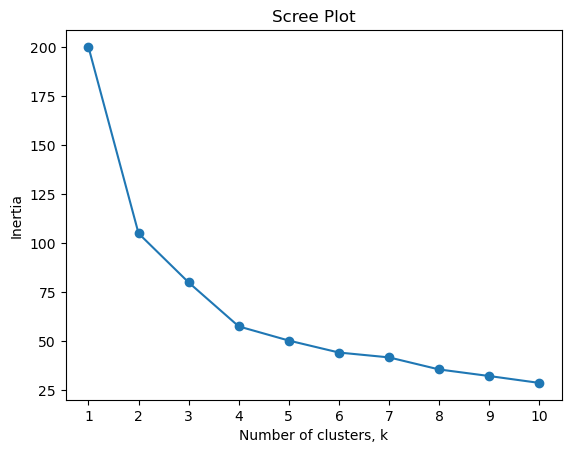

[[ 1.01513667  1.02412028  0.19959126  0.85556386]
 [-0.67675778 -0.68274685 -0.13306084 -0.57037591]]


,Murder,Assault,UrbanPop,Rape,ClustID
Alabama,13.2,236,58,21.2,0
Texas,12.7,201,80,25.5,0
Tennessee,13.2,188,59,26.9,0
South Carolina,14.4,279,48,22.5,0
North Carolina,13.0,337,45,16.1,0
New York,11.1,254,86,26.1,0
New Mexico,11.4,285,70,32.1,0
Nevada,12.2,252,81,46.0,0
Mississippi,16.1,259,44,17.1,0
Michigan,12.1,255,74,35.1,0


In [7]:
df = pd.read_csv("USArrests.csv",index_col=0)
from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
scaled=scaler.fit_transform(df)

scaled = pd.DataFrame(scaled,
                          columns=df.columns,
                          index=df.index)

# Import KMeans
from sklearn.cluster import KMeans


clustNos = [1,2,3,4,5,6,7,8,9,10]
Inertia = []

for i in clustNos :
    model = KMeans(n_clusters=i,random_state=2021)
    model.fit(scaled)
    Inertia.append(model.inertia_)
    
# Import pyplot
import matplotlib.pyplot as plt

plt.plot(clustNos, Inertia, '-o')
plt.title("Scree Plot")
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clustNos)
plt.show()

# Create a KMeans instance with clusters: Best k model
model = KMeans(n_clusters=2,random_state=2021)

# Fit model to points
model.fit(scaled)

# Cluster Centroids
print(model.cluster_centers_)

#model.n_init
# Determine the cluster labels of new_points: labels
labels = model.predict(scaled)


clusterID = pd.DataFrame({'ClustID':labels},index=df.index)
clusteredData = pd.concat([df,clusterID],
                          axis='columns')

clusteredData.groupby('ClustID').mean()
clusteredData.sort_values('ClustID')


[2.53085875 1.00996444 0.36383998 0.17696948]
4.081632653061225
[0.62006039 0.24744129 0.0891408  0.04335752]
[43.40422764 17.32089017  6.23985566  3.03502654]


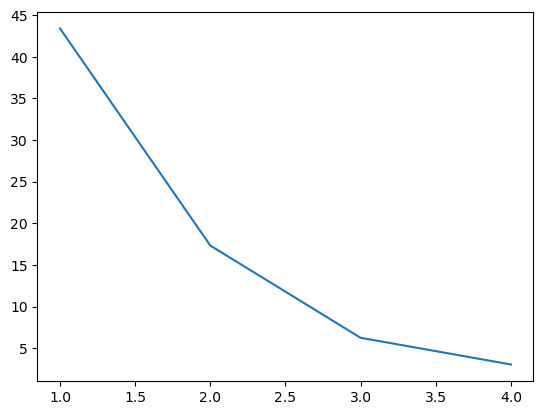

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(scaled)
print(pca.explained_variance_)
print(np.sum(pca.explained_variance_))
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_ * 70) 
 
import matplotlib.pyplot as plt
ys = pca.explained_variance_ratio_ * 70
xs = np.arange(1,5)
plt.plot(xs,ys)
plt.show()


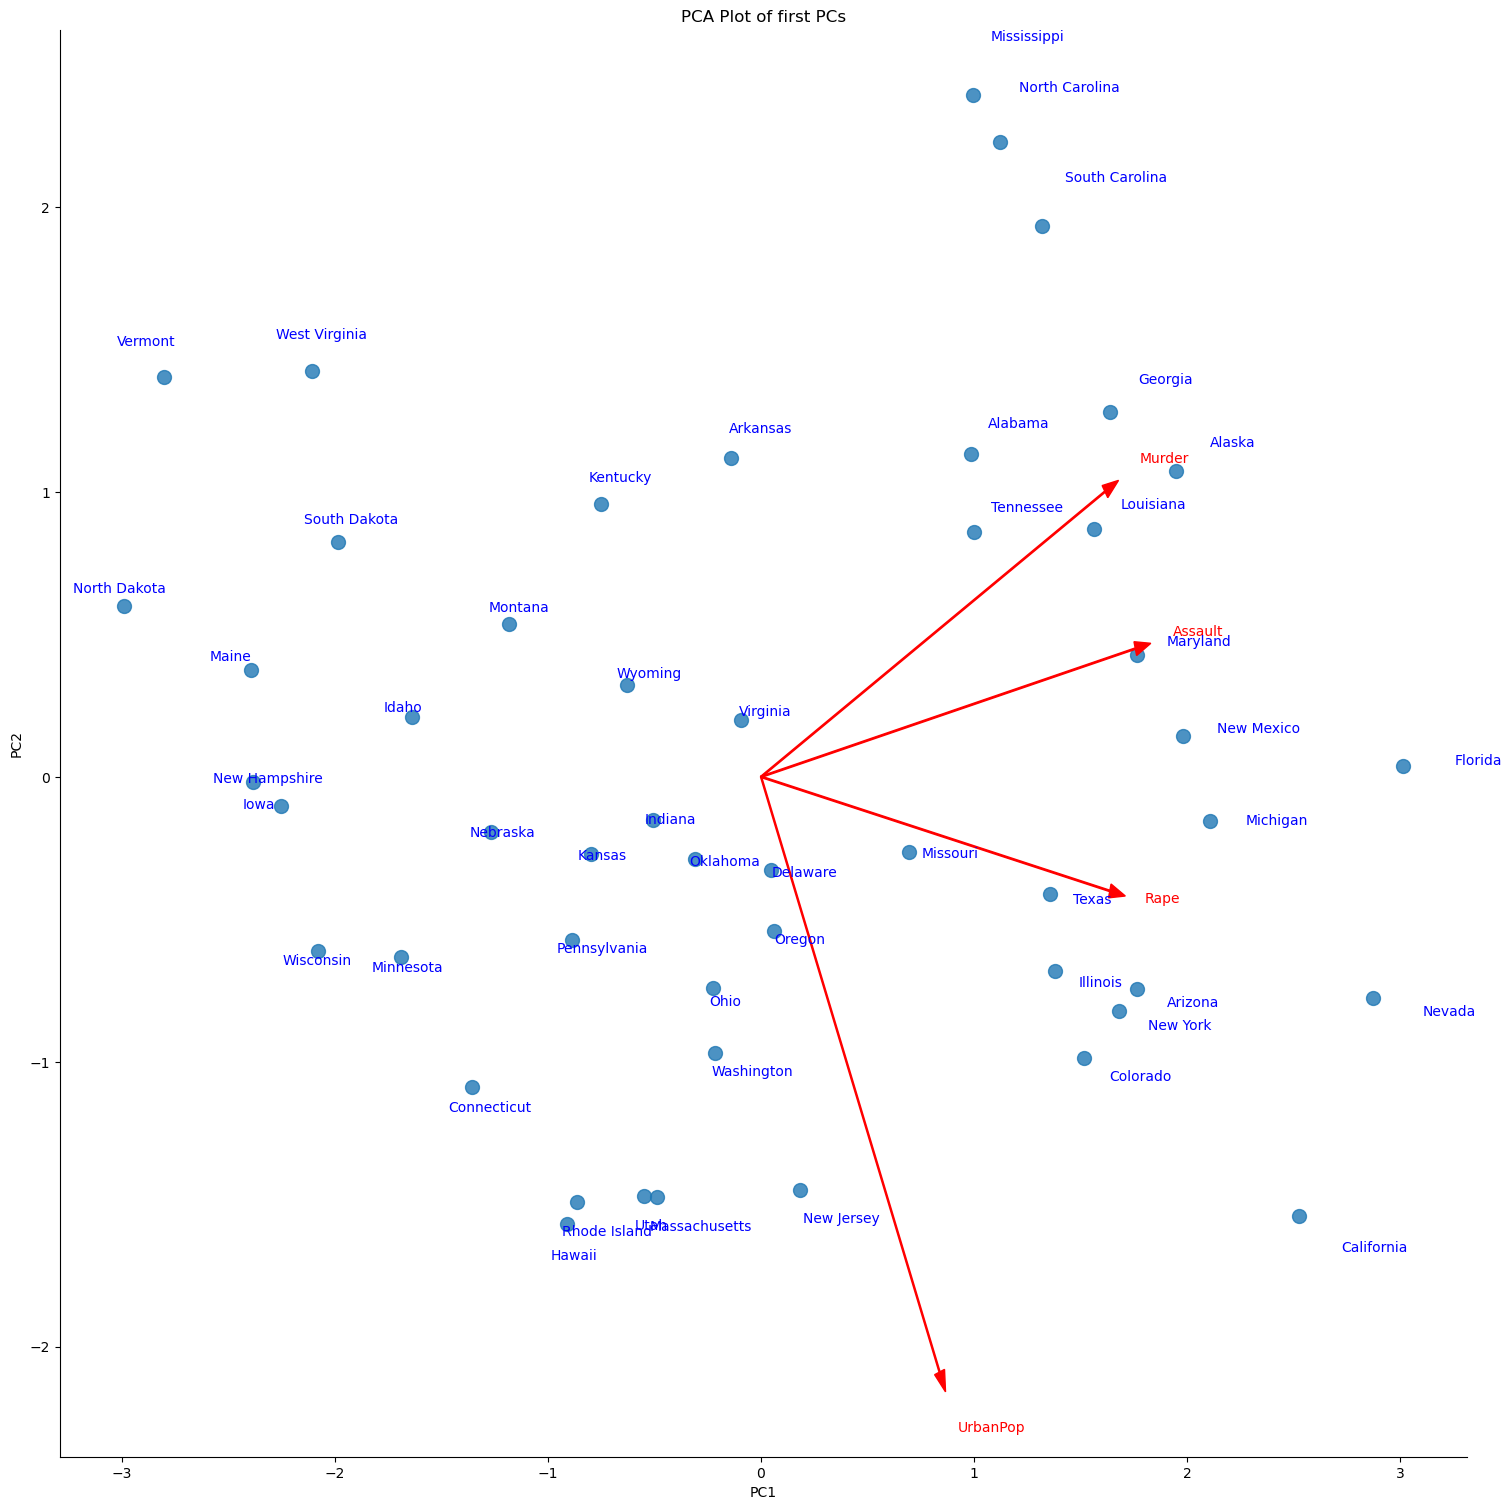

In [9]:
# principalComponents are PCA scores

df_plot = pd.DataFrame(principalComponents,
                 columns = ['PC1', 'PC2','PC3','PC4'],
                 index = df.index)

pca_loadings = pd.DataFrame(pca.components_.T, index=df.columns, columns=['V1', 'V2','V3','V4'] )
pca_loadings


#biplot
import seaborn as sns
 
# Scatter plot based and assigne color based on 'label - y'
sns.lmplot('PC1', 'PC2', data=df_plot, fit_reg = False, size = 15, scatter_kws={"s": 100})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each *original features*
xvector = pca.components_[0]
yvector = pca.components_[1]
 
# value of the first two PCs, set the x, y axis boundary
xs = df_plot['PC1']
ys = df_plot['PC2']
 
## visualize projections
 
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df.columns.values)[i], color='r')
 
for i in range(len(xs)):
    plt.text(xs[i]*1.08, ys[i]*1.08, list(df.index)[i], color='b') # index number of each observations
plt.title('PCA Plot of first PCs')
plt.show()


### 4. Consider dataset WGEM-IND_CPTOTNSXN.csv. Try out
(10 marks)
-  Different ARIMA models (using auto_arima( ) of pmdarima package, non-seasonal)
-  LSTM model (timesteps = 4, train size=25, test size=6) and mention the best models for each of them.

( Marks: 5 for each 1. and 2. : 1.5 for use of correct function, 3.5 for ARIMA options)

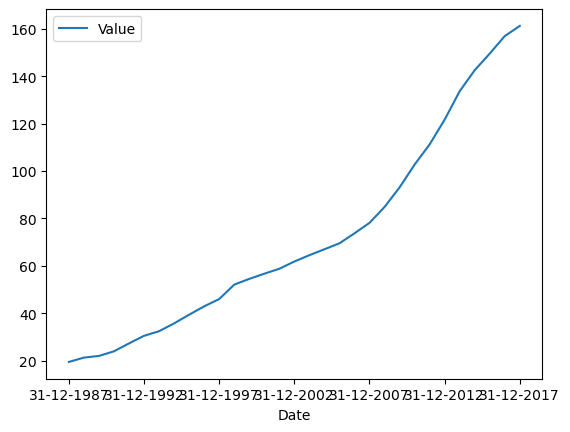

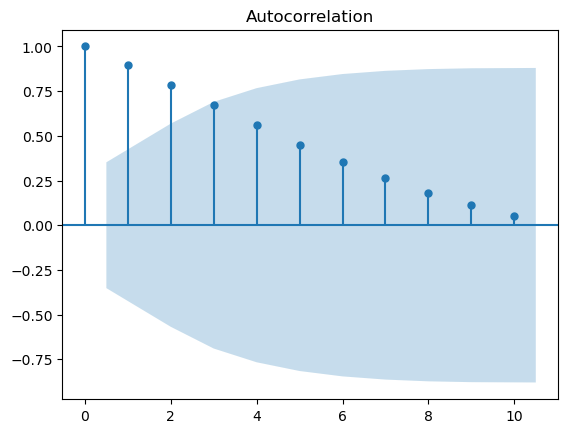

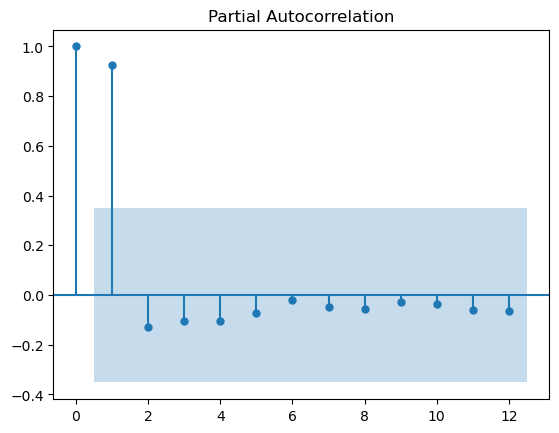

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=83.169, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=84.470, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=84.512, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=84.167, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.526 seconds
Lag: 15
Coefficients: const        0.010136
L1.Value     0.517078
L2.Value     0.277654
L3.Value     0.112975
L4.Value     0.232485
L5.Value    -0.068334
L6.Value    -0.035277
L7.Value    -0.293238
L8.Value    -0.247517
L9.Value    -0.268790
L10.Value    0.307330
L11.Value    0.418073
L12.Value    0.357319
L13.Value   -0.251532
L14.Value    0.206155
L15.Value    0.154698
dtype: float64
Test RMSE: 6.358


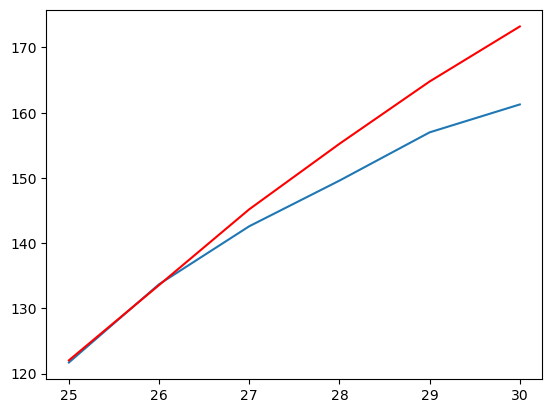

Test RMSE: 6.358


In [10]:
df = pd.read_csv("WGEM-IND_CPTOTNSXN.csv")
df.head()

import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error


df.plot.line(x = 'Date',y = 'Value')
plt.show()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Value'], lags=10)
plt.show()

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Value'], lags=12)
plt.show()

y = df['Value']
y_train = y[:25]
y_test = y[25:]


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

from statsmodels.tsa.ar_model import AR
# train autoregression
model = AR(y_train)
model_fit = model.fit(maxlag=15)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)
    
error = mean_squared_error(y_test, predictions)
print('Test RMSE: %.3f' % sqrt(error))
# plot results
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

# plot
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")

rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

Lag: 0
Coefficients: const          55.092282
ma.L1.Value     0.999901
dtype: float64
Test RMSE: 87.451


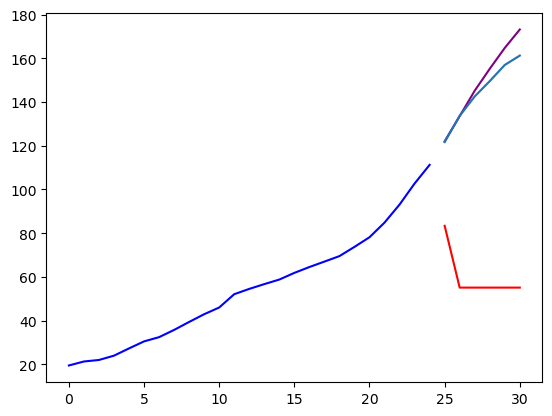

Test RMSE: 87.451


In [11]:
from statsmodels.tsa.arima_model import ARMA

# train MA
model = ARMA(y_train,order=(0,1))
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)
    
error = mean_squared_error(y_test, predictions)
print('Test RMSE: %.3f' % sqrt(error))
# plot results
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

# plot
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")

rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

#### 1 ) ARMA 

#### 2) ARIMA